### Deliverables:

#### 1. Data Preparation - NLP 

- Removing special characters using regex

-- Importing Modules

In [79]:
import pandas as pd
import numpy as np
import os
import nltk
import re
import spacy

nlp=spacy.load("en_core_web_lg")

In [80]:
df = pd.read_excel("D:/NLP/data/bank_a_sentiment_analysis_translated_inputdata.xlsx")
df_test=pd.read_excel("D:/NLP/data/bank_a_sentiment_analysis_translated_inputdata_unseen.xlsx")
print(df.info(),"Shape:",df.shape)
df = df[["translated_review","actual_sentiment"]]
df_test = df_test[["translated_review","actual_sentiment"]]
# df=df[df["actual_sentiment"]!="Neutral"]
# df_test=df_test[df_test["actual_sentiment"]!="Neutral"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3486 entries, 0 to 3485
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_id          3486 non-null   float64
 1   translated_review  3481 non-null   object 
 2   actual_sentiment   3482 non-null   object 
dtypes: float64(1), object(2)
memory usage: 81.8+ KB
None Shape: (3486, 3)


#### Q1. Provide a report for data sufficiency, sparsity, and anomalies in each data source

In [81]:
df.describe(include="all")

,translated_review,actual_sentiment
count,3481,3482
unique,3306,3
top,because i am fine,Positive
freq,11,1834


In [82]:
# Sparsity
sparsity=(df.to_numpy()==0).mean()
print("Data Sparsity of our dataframe is:",sparsity)

Data Sparsity of our dataframe is: 0.0


#### Q2. Identify and handle empty/ blank/ NA reviews, blanks in the actual sentiment column, very long or short review texts

In [83]:
# Since we cannot impute text data. Therefore, removing empty/blank/NA values from dataset.
df=df.dropna().reset_index()
df=df.drop("index",axis=1)
df_test=df_test.dropna().reset_index()
df_test=df_test.drop("index",axis=1)

##### Q3: Identify the special characters to keep and remove from the text

In [84]:
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)

    return "".join(cleantext)

df['preprocessed_text']=df['translated_review'].map(lambda s:preprocess(s)) 
df_test['preprocessed_text']=df_test['translated_review'].map(lambda s:preprocess(s)) 

#### Q4: Perform the required text cleaning operations to suit the model (note that some downstream sentiment models don’t require text cleaning)

In [85]:
df['preprocessed_text'] = df['preprocessed_text'].str.replace('[^\w\s]','')
df_test['preprocessed_text'] = df_test['preprocessed_text'].str.replace('[^\w\s]','')

C:\Users\SAURAB~1.MIS\AppData\Local\Temp/ipykernel_21136/4154870127.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['preprocessed_text'] = df['preprocessed_text'].str.replace('[^\w\s]','')
C:\Users\SAURAB~1.MIS\AppData\Local\Temp/ipykernel_21136/4154870127.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test['preprocessed_text'] = df_test['preprocessed_text'].str.replace('[^\w\s]','')


In [86]:
# StopWords Removal
from nltk.corpus import stopwords
# stopwords = en.Defaults.stop_words
stop = stopwords.words('english')
not_stop=["no","not","too"]
for i in not_stop:
    if i in stop:
        stop.remove(i)
df['clean_text'] = df['preprocessed_text'].apply(lambda x: " ".join(i for i in x.split() if i not in stop))
# Stemming
df["cleaned_text"]=df["clean_text"].apply(lambda x: " ".join(token.lemma_ for token in nlp(x) if not (token.like_num or token.is_punct or token.is_space or len(token)==1)))
df=df[["cleaned_text","actual_sentiment"]]

df_test['clean_text'] = df_test['preprocessed_text'].apply(lambda x: " ".join(i for i in x.split() if i not in stop))
# Stemming
df_test["cleaned_text"]=df_test["clean_text"].apply(lambda x: " ".join(token.lemma_ for token in nlp(x) if not (token.like_num or token.is_punct or token.is_space or len(token)==1)))
df_test=df_test[["cleaned_text","actual_sentiment"]]
df

,cleaned_text,actual_sentiment
0,branch san marco evangelista employee include ...,Positive
1,commission withdraw money counter theft,Negative
2,f24 app thank,Neutral
3,low commission,Neutral
4,promote support small business territory,Positive
...,...,...
3472,availability rapidity,Neutral
3473,serious reliable comfort payment etc,Neutral
3474,norm,Neutral
3475,poor interest customer,Negative


### 2. Exploratory Data Analysis (EDA)

#### Q1.

In [87]:
def corpus(text):
    text_list = text.split()
    return text_list

In [88]:
df

,cleaned_text,actual_sentiment
0,branch san marco evangelista employee include ...,Positive
1,commission withdraw money counter theft,Negative
2,f24 app thank,Neutral
3,low commission,Neutral
4,promote support small business territory,Positive
...,...,...
3472,availability rapidity,Neutral
3473,serious reliable comfort payment etc,Neutral
3474,norm,Neutral
3475,poor interest customer,Negative


In [89]:
df=df[df["actual_sentiment"]=="Neutral"].reset_index()
df=df.drop("index",axis=1)
df['text_list'] = df['cleaned_text'].apply(corpus)
df.head(10)

,cleaned_text,actual_sentiment,text_list
0,f24 app thank,Neutral,"[f24, app, thank]"
1,low commission,Neutral,"[low, commission]"
2,add name company prematarcored bulletin,Neutral,"[add, name, company, prematarcored, bulletin]"
3,paper account extract make well operation mana...,Neutral,"[paper, account, extract, make, well, operatio..."
4,open branch trecate,Neutral,"[open, branch, trecate]"
5,happy new year taldeital,Neutral,"[happy, new, year, taldeital]"
6,happy holiday wish,Neutral,"[happy, holiday, wish]"
7,increase open hour branch,Neutral,"[increase, open, hour, branch]"
8,change navigation system make simple incomplet...,Neutral,"[change, navigation, system, make, simple, inc..."
9,well online charge cost current account counte...,Neutral,"[well, online, charge, cost, current, account,..."


In [90]:
from tqdm import trange

corpus = []
for i in trange(df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += df['text_list'][i]
len(corpus)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1046/1046 [00:00<00:00, 39445.46it/s]


5560

In [91]:
from collections import Counter

mostCommon = Counter(corpus).most_common(10)
mostCommon

[('bank', 206),
 ('service', 157),
 ('good', 120),
 ('not', 102),
 ('customer', 94),
 ('staff', 85),
 ('always', 66),
 ('availability', 66),
 ('well', 65),
 ('online', 65)]

In [92]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

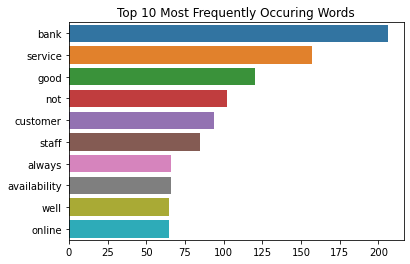

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

In [94]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df['cleaned_text'])
bigrams = cv.fit_transform(df['cleaned_text'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

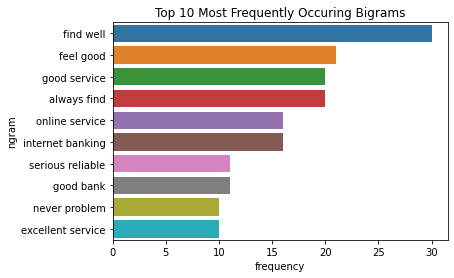

In [95]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

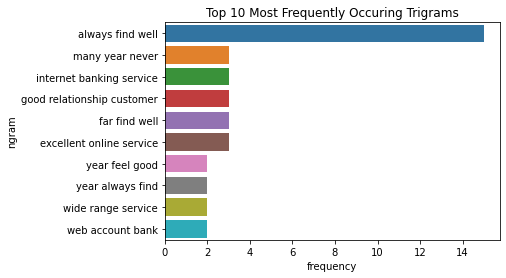

In [96]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df['cleaned_text'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

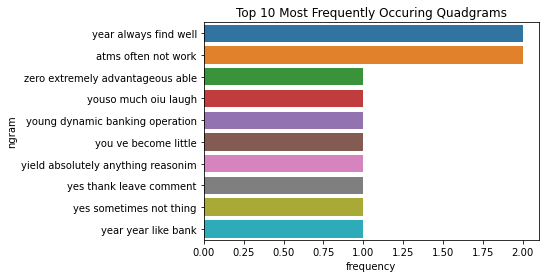

In [97]:
cv1 = CountVectorizer(ngram_range=(4,4))
trigrams = cv1.fit_transform(df['cleaned_text'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Quadgrams')
plt.show()

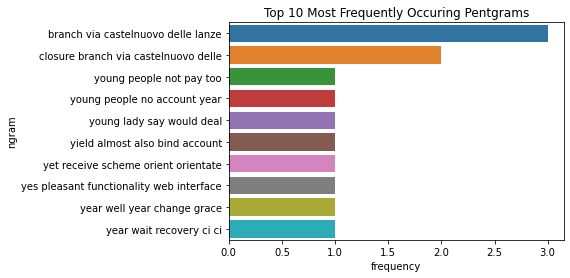

In [78]:
cv1 = CountVectorizer(ngram_range=(5,5))
trigrams = cv1.fit_transform(df['cleaned_text'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Pentgrams')
plt.show()

In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

# Torch ML libraries
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

# Misc.
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Set intial variables and constants
%config InlineBackend.figure_format='retina'

# Graph Designs
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 8, 6

# Random seed for reproducibilty
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

# Set GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Text(0.5, 0, 'review score')

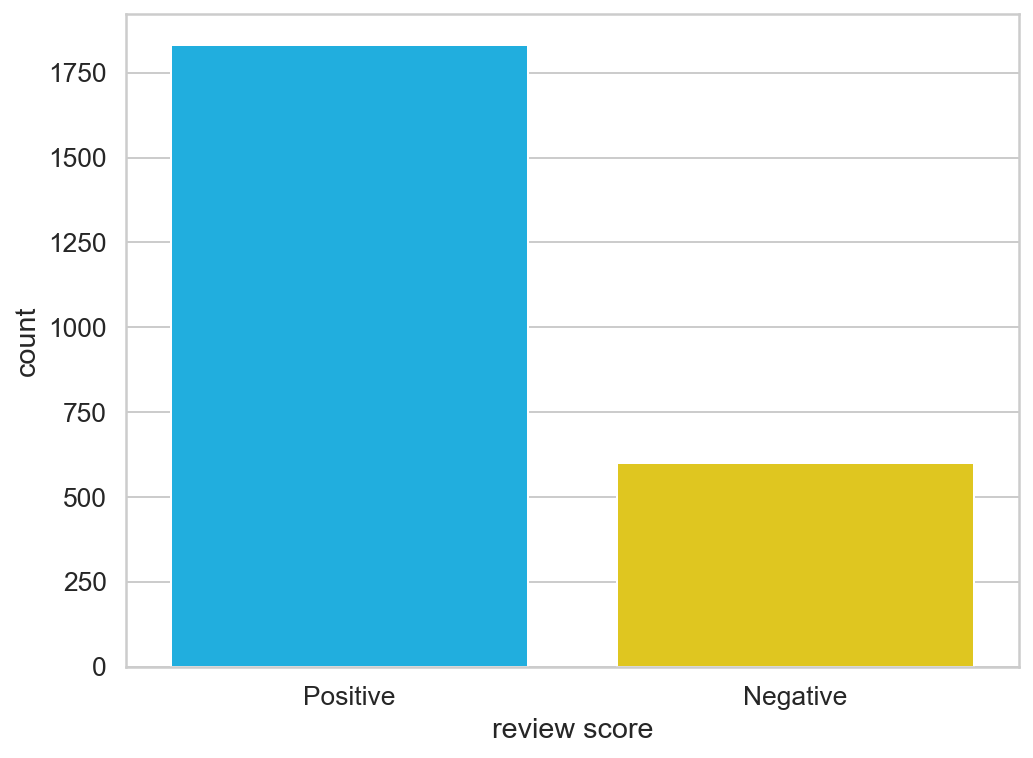

In [22]:
# Let's have a look at the class balance.
sns.countplot(df.actual_sentiment)
plt.xlabel('review score')

In [23]:
# Function to convert score to sentiment
def to_sentiment(rating):
    
    # Convert to class
    if rating == "Negative":
        return 0
    elif rating == "Neutral":
        return 1
    else:
        return 2

# Apply to the dataset 
df['sentiment'] = df.actual_sentiment.apply(to_sentiment)
df_test['sentiment'] = df_test.actual_sentiment.apply(to_sentiment)

In [24]:
# Set the model name
MODEL_NAME = 'bert-base-uncased'

# Build a BERT based tokenizer
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

In [25]:
# Some of the common BERT tokens
print(tokenizer.sep_token, tokenizer.sep_token_id) # marker for ending of a sentence
print(tokenizer.cls_token, tokenizer.cls_token_id) # start of each sentence, so BERT knows we’re doing classification
print(tokenizer.pad_token, tokenizer.pad_token_id) # special token for padding
print(tokenizer.unk_token, tokenizer.unk_token_id) # tokens not found in training set 

[SEP] 102
[CLS] 101
[PAD] 0
[UNK] 100


In [26]:
# Store length of each review 
token_lens = []

# Iterate through the content slide
for txt in df.cleaned_text:
    tokens = tokenizer.encode(txt, max_length=512)
    token_lens.append(len(tokens))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Text(0.5, 0, 'Token count')

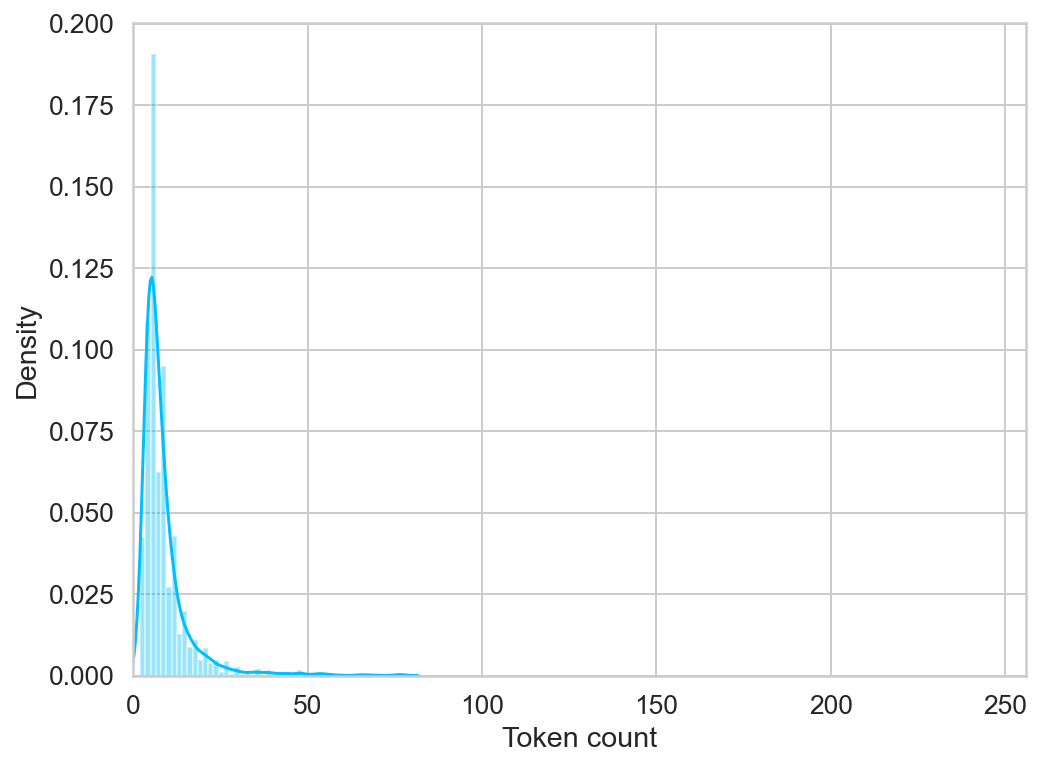

In [27]:
# plot the distribution of review lengths 
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count')

In [28]:
MAX_LEN = 100

class BankReviewDataset(Dataset):
    # Constructor Function 
    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    # Length magic method
    def __len__(self):
        return len(self.reviews)
    
    # get item magic method
    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]
        
        # Encoded format to be returned 
        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        
        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
        }

In [29]:
df_train, df_val = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)

In [30]:
def create_data_loader(df, tokenizer, max_len, batch_size):
    ds = BankReviewDataset(
        reviews=df.cleaned_text.to_numpy(),
        targets=df.sentiment.to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
    )
    
    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=0
    )

In [31]:
# Create train, test and val data loaders
BATCH_SIZE = 32
train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [32]:
# Examples 
data = next(iter(train_data_loader))
print(data.keys())

print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])
torch.Size([32, 100])
torch.Size([32, 100])
torch.Size([32])


In [33]:
# Load the basic BERT model 
bert_model = BertModel.from_pretrained(MODEL_NAME)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [34]:
# Build the Sentiment Classifier class 
class SentimentClassifier(nn.Module):
    
    # Constructor class 
    def __init__(self, n_classes):
        super(SentimentClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(MODEL_NAME)
        self.drop = nn.Dropout(p=0.5)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
    
    # Forward propagaion class
    def forward(self, input_ids, attention_mask):
        bertOutput = self.bert(
          input_ids=input_ids,
          attention_mask=attention_mask
        )
        
        #  Add a dropout layer 
        output = self.drop(bertOutput['pooler_output'])
        return self.out(output)

In [35]:
# Instantiate the model and move to classifier
class_names = ['negative', 'neutral', 'positive']
model = SentimentClassifier(len(class_names))
model = model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [36]:
# Number of hidden units
print(bert_model.config.hidden_size)

768


In [37]:
# Number of iterations 
EPOCHS = 10

# Optimizer Adam 
optimizer = AdamW(model.parameters(), lr=2e-6, correct_bias=False)

total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Set the loss function 
loss_fn = nn.CrossEntropyLoss().to(device)

In [38]:
# Function for a single training iteration
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0
    
    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)
        
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        
        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, targets)
        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())
        
        # Backward prop
        loss.backward()
        
        # Gradient Descent
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
    
    return correct_predictions.double() / n_examples, np.mean(losses)

In [39]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()
    
    losses = []
    correct_predictions = 0
    
    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)
            
            # Get model ouptuts
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            
            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, targets)
            
            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())
            
    return correct_predictions.double() / n_examples, np.mean(losses)

In [40]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):
    
    # Show details 
    print(f"Epoch {epoch + 1}/{EPOCHS}")
    print("-" * 10)
    
    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(df_train)
    )
    
    print(f"Train loss {train_loss} accuracy {train_acc}")
    
    # Get model performance (accuracy and loss)
    val_acc, val_loss = eval_model(
        model,
        val_data_loader,
        loss_fn,
        device,
        len(df_val)
    )
    
    print(f"Val   loss {val_loss} accuracy {val_acc}")
    print()
    
    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)
    
    # If we beat prev performance
    if val_acc > best_accuracy:
        torch.save(model.state_dict(), 'best_model_state.bin')
        best_accuracy = val_acc

Epoch 1/10
----------
Train loss 0.6256690978026781 accuracy 0.7556584362139918
Val   loss 0.4453913401812315 accuracy 0.8172484599589322

Epoch 2/10
----------
Train loss 0.3996009377182507 accuracy 0.852366255144033
Val   loss 0.350479987449944 accuracy 0.8952772073921971

Epoch 3/10
----------
Train loss 0.3121291124185578 accuracy 0.9032921810699589
Val   loss 0.3318343018181622 accuracy 0.8850102669404517

Epoch 4/10
----------
Train loss 0.2679329596337725 accuracy 0.9166666666666666
Val   loss 0.3264925302937627 accuracy 0.8891170431211499

Epoch 5/10
----------
Train loss 0.24180225356191884 accuracy 0.9300411522633745
Val   loss 0.3200931935571134 accuracy 0.8850102669404517

Epoch 6/10
----------
Train loss 0.21679157006447433 accuracy 0.9423868312757202
Val   loss 0.3168564878869802 accuracy 0.8870636550308009

Epoch 7/10
----------
Train loss 0.20821182442004563 accuracy 0.9449588477366255
Val   loss 0.31763861095532775 accuracy 0.8850102669404517

Epoch 8/10
----------
Tra

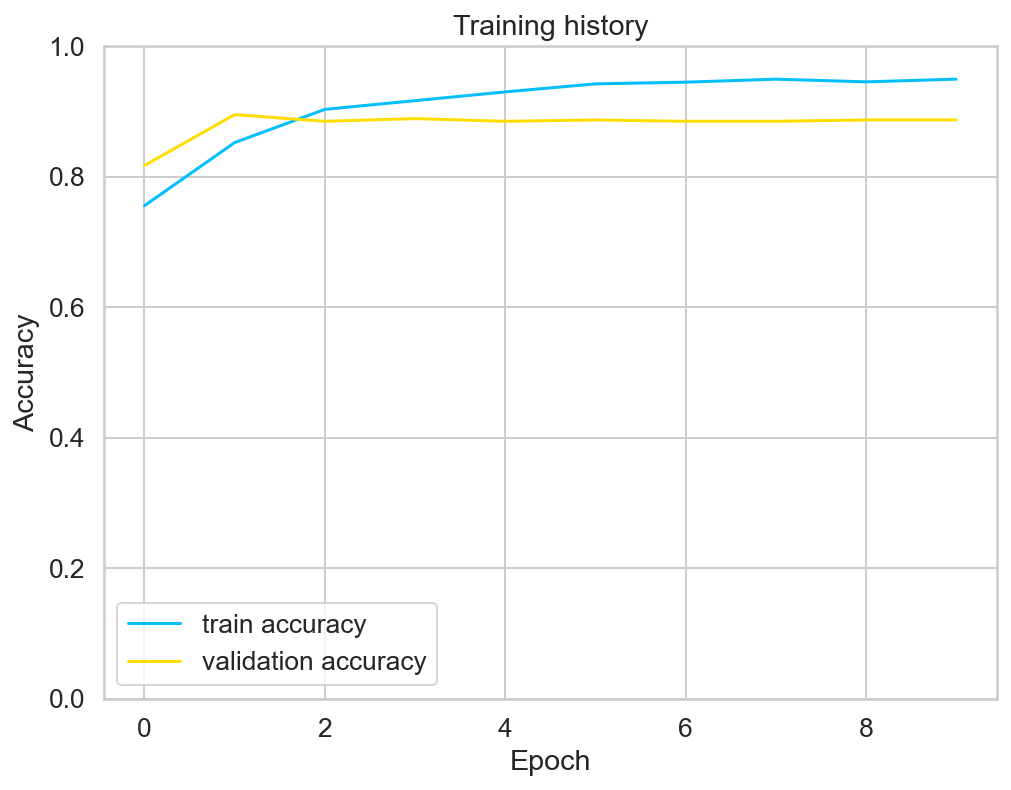

In [41]:
# Plot training and validation accuracy
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')

# Graph chars
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

In [42]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()

0.9285714285714286

In [43]:
def get_predictions(model, data_loader):
    model = model.eval()

    review_texts = []
    predictions = []
    prediction_probs = []
    real_values = []

    with torch.no_grad():
        for d in data_loader:
            texts = d["review_text"]
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            # Get outouts
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            _, preds = torch.max(outputs, dim=1)

            review_texts.extend(texts)
            predictions.extend(preds)
            prediction_probs.extend(outputs)
            real_values.extend(targets)

    predictions = torch.stack(predictions).cpu()
    prediction_probs = torch.stack(prediction_probs).cpu()
    real_values = torch.stack(real_values).cpu()

    return review_texts, predictions, prediction_probs, real_values

In [44]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
    model,
    test_data_loader
)

In [56]:
print(classification_report(y_test, y_pred, target_names=["Negative","Positive"]))

              precision    recall  f1-score   support

    Negative       0.93      0.76      0.84        34
    Positive       0.93      0.98      0.95       106

    accuracy                           0.93       140
   macro avg       0.93      0.87      0.90       140
weighted avg       0.93      0.93      0.93       140



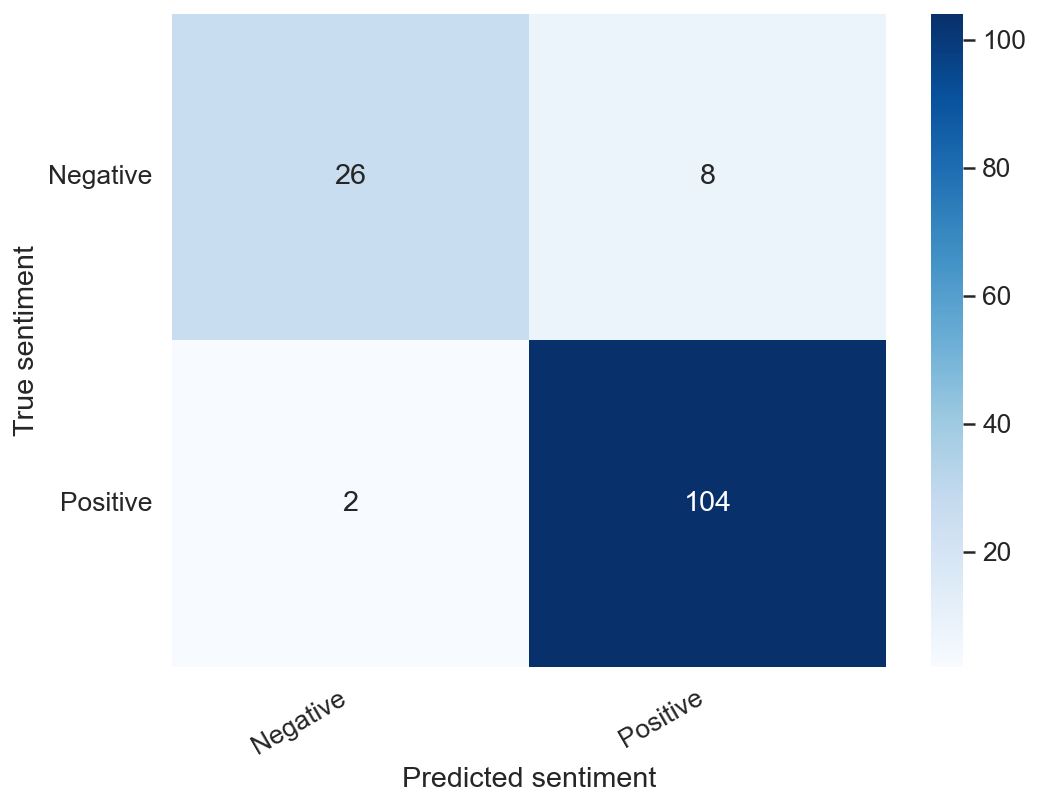

In [59]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True sentiment')
    plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=["Negative","Positive"], columns=["Negative","Positive"])
show_confusion_matrix(df_cm)